In [ ]:
saved = joblib.load("preprocessor.joblib")
saved_preprocessor = saved["preprocessor"]

In [ ]:
# split data
X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train["TARGET"].copy()

In [ ]:
# Training split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56549
           1       0.16      0.67      0.26      4953

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.90      0.69      0.76     61502



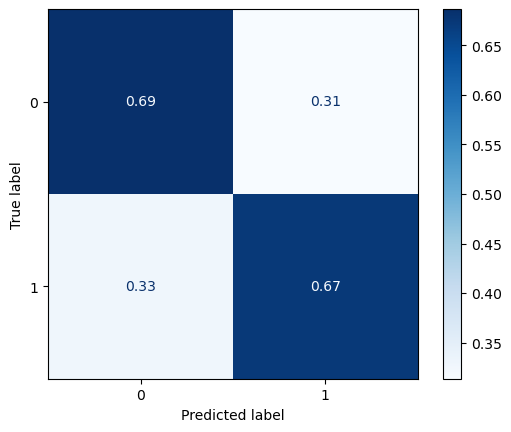

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226137
           1       0.16      0.66      0.25     19872

    accuracy                           0.68    246009
   macro avg       0.56      0.67      0.53    246009
weighted avg       0.89      0.68      0.75    246009



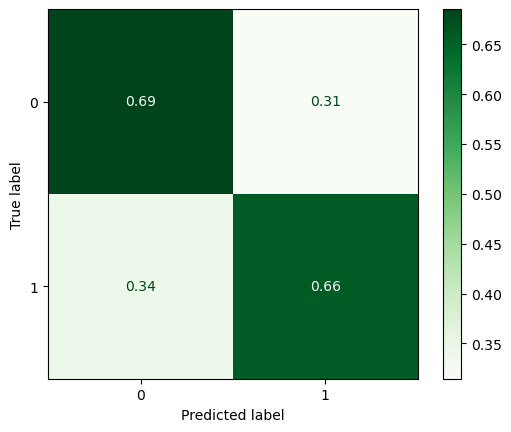

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
Logistic Regression Balanced Class Weights,0.685262,0.683199,0.158187,0.15539,0.672925,0.658766,0.256158,0.251465,0.745679,0.731948


In [ ]:
logreg_balanced = LogisticRegression(max_iter=1000, class_weight="balanced")

logreg_balanced_pipe = make_pipeline(preprocessor, StandardScaler(), logreg_balanced)

logreg_balanced_pipe.fit(X_train, y_train)

balanced_results = eval_classification(logreg_balanced_pipe, X_train, y_train, X_test, y_test,
                              model_name="Logistic Regression Balanced Class Weights")

balanced_results


In [ ]:
# from sklearn.model_selection import GridSearchCV

# knn = KNeighborsClassifier()
# param_space = {'n_neighbors': range(3,8)}
# knn_gs = GridSearchCV(knn, param_space)
# knn_gs.fit(X_train_proc, y_train)
# best_knn = knn_gs.best_estimator_
# best_knn

In [ ]:
# knn_pipe = Pipeline([("scaler", StandardScaler()), ("knn", best_knn)])

# knn_pipe.fit(X_train_proc, y_train)

In [ ]:
# zero_imputer.fit(X)

# zero_X = zero_imputer.transform(X)
# knn_pipe2 = Pipeline([("scaler", StandardScaler()), 
#                       ("knn", KNeighborsClassifier(n_neighbors=6))])

# knn_pipe2.fit(zero_X, y) 

# zero_X_cols = zero_X.columns.to_list()
